In [1]:
#importing library
import numpy as np
import pandas as pd

In [67]:
#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from ipywidgets import interact

In [5]:
#reading Dataset
data= pd.read_csv('crop_reco.csv')

In [6]:
data.shape

(2200, 8)

In [7]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
#checking null values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [12]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [61]:
@interact
def summary(crops=list(data['label'].value_counts().index)):
    x=data[data['label']==crops]
    print('------------')
    print('Statistics for Nitrogen')
    print('Minimum Nitrogen Required:',x['N'].min())
    print('Average Nitrogen Required:',x['N'].mean())
    print('Maximum Nitrogen Required:',x['N'].max())
    print('------------')
    print('Statistics for Phosphorous')
    print('Minimum Phosphorous Required:',x['P'].min())
    print('Average Phosphorous Required:',x['P'].mean())
    print('Maximum Phosphorous Required:',x['P'].max())
    print('------------')
    print('Statistics for Potassium ')
    print('Minimum Potassium Required:',x['K'].min())
    print('Average Potassium Required:',x['K'].mean())
    print('Maximum Potassium Required:',x['K'].max())
    print('------------')
    print('Statistics for Temperature')
    print('Minimum Temperature Required:',x['temperature'].min())
    print('Average Temperature Required:',x['temperature'].mean())
    print('Maximum Temperature Required:',x['temperature'].max())
    print('------------')
    print('Statistics for Humidity')
    print('Minimum Humidity Required:',x['humidity'].min())
    print('Average Humidity Required:',x['humidity'].mean())
    print('Maximum Humidity Required:',x['humidity'].max())
    print('------------')
    print('Statistics for ph')
    print('Minimum ph Required:',x['ph'].min())
    print('Average ph Required:',x['ph'].mean())
    print('Maximum ph Required:',x['ph'].max())
    print('------------')
    print('Statistics for Rainfall')
    print('Minimum Rainfall Required:',x['rainfall'].min())
    print('Average Rainfall Required:',x['rainfall'].mean())
    print('Maximum Rainfall Required:',x['rainfall'].max())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [64]:
print('Patterns in the data')
print('------------------------')
print("Crops that need very high ratio of Nitrogen in Soil: ",data[data['N']>120]['label'].unique())
print("Crops that need very high ratio of Phosphorous in Soil: ",data[data['P']>100]['label'].unique())
print("Crops that need very high ratio of Potassium in Soil: ",data[data['K']>200]['label'].unique())
print("Crops that need very Rainfall: ",data[data['rainfall']>200]['label'].unique())
print("Crops that need very High Temperature: ",data[data['temperature']>40]['label'].unique())
print("Crops that need very Low Temperature: ",data[data['temperature']<10]['label'].unique())
print("Crops that need very Low Humidity: ",data[data['humidity']<20]['label'].unique())
print("Crops that need very Low ph: ",data[data['ph']<4]['label'].unique())
print("Crops that need very High ph: ",data[data['ph']>9]['label'].unique())

Patterns in the data
------------------------
Crops that need very high ratio of Nitrogen in Soil:  ['cotton']
Crops that need very high ratio of Phosphorous in Soil:  ['grapes' 'apple']
Crops that need very high ratio of Potassium in Soil:  ['grapes' 'apple']
Crops that need very Rainfall:  ['rice' 'papaya' 'coconut']
Crops that need very High Temperature:  ['grapes' 'papaya']
Crops that need very Low Temperature:  ['grapes']
Crops that need very Low Humidity:  ['chickpea' 'kidneybeans']
Crops that need very Low ph:  ['mothbeans']
Crops that need very High ph:  ['mothbeans']


In [66]:
# Classify Based On Season
print('Summer Crops are:',data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())
print('Winter Crops are:',data[(data['temperature']<20) & (data['humidity']>30)]['label'].unique())
print('Rainy Crops are:',data[(data['rainfall']>200) & (data['humidity']>30)]['label'].unique())

Summer Crops are: ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops are: ['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops are: ['rice' 'papaya' 'coconut']


In [17]:
#Forming Clusters 
from sklearn.cluster import KMeans
x= data.drop(['label'],axis=1)
x=x.values

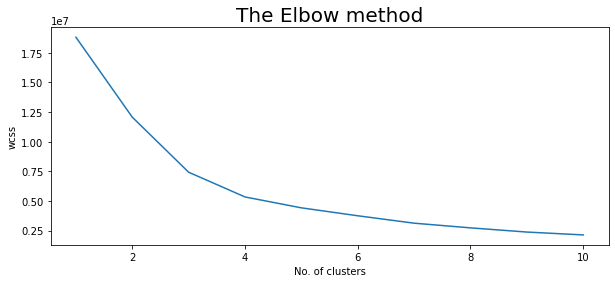

In [18]:
plt.rcParams['figure.figsize']=(10,4)
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow method',fontsize=20)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

In [41]:
#Based on the graph 4 optimal clusters
km=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)

a=data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns={0:'cluster'})

print("Crops in 1st Cluster:",z[z['cluster']==0]['label'].unique())
print("Crops in 2nd Cluster:",z[z['cluster']==1]['label'].unique())
print("Crops in 3rd Cluster:",z[z['cluster']==2]['label'].unique())
print("Crops in 4th Cluster:",z[z['cluster']==3]['label'].unique())

Crops in 1st Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Crops in 2nd Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Crops in 3rd Cluster: ['grapes' 'apple']
Crops in 4th Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [42]:
#For Predictive Modelling
y=data['label']
x=data.drop(['label'],axis=1)

In [43]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
x_train.shape

(1760, 7)

In [45]:
x_test.shape

(440, 7)

In [50]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred, normalize=False))

426


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [56]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [59]:
predic=model.predict((np.array([[90,40,40,20,80,7,200]])))
print('Suggested Crop For Given Climatic Conditions:',predic)

Suggested Crop For Given Climatic Conditions: ['rice']


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 0, 'pH level')

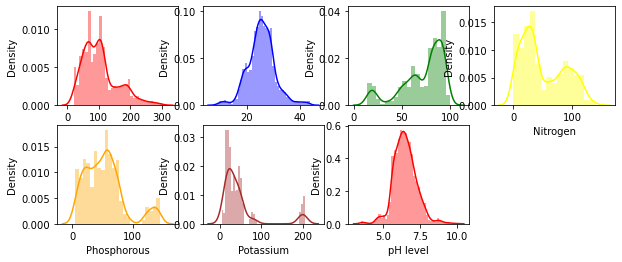

In [71]:
plt.subplot(2,4,1)
sns.distplot(data['rainfall'],color='red')
plt.xlabel('Rainfall')
plt.subplot(2,4,2)
sns.distplot(data['temperature'],color='blue')
plt.xlabel('Temperature')
plt.subplot(2,4,3)
sns.distplot(data['humidity'],color='green')
plt.xlabel('Humidity')
plt.subplot(2,4,4)
sns.distplot(data['N'],color='yellow')
plt.xlabel('Nitrogen')
plt.subplot(2,4,5)
sns.distplot(data['P'],color='orange')
plt.xlabel('Phosphorous')
plt.subplot(2,4,6)
sns.distplot(data['K'],color='brown')
plt.xlabel('Potassium')
plt.subplot(2,4,7)
sns.distplot(data['ph'],color='red')
plt.xlabel('pH level')